In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cov import generate
from metric import wasserstein, kr

In [2]:
W_res = []
kr_res = []
nums = [i for i in range(10, 150)]
for num in nums:
    C_m, C_n = generate(num=num)
    W_res.append(wasserstein(C_m, C_n))
    kr_res.append(kr(C_m, C_n))

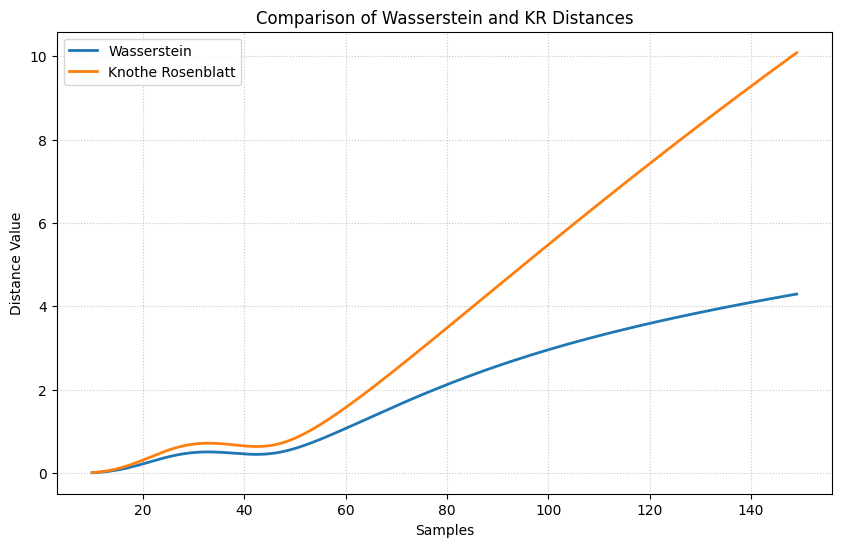

In [3]:
# グラフのサイズを設定（任意）
plt.figure(figsize=(10, 6))
plt.plot(nums, W_res, label="Wasserstein", linestyle="-", linewidth=2)
plt.plot(nums, kr_res, label="Knothe Rosenblatt", linestyle="-", linewidth=2)
plt.xlabel("Samples")
plt.ylabel("Distance Value")
plt.title("Comparison of Wasserstein and KR Distances")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [4]:
kr_res = []
krs_res = []
nums = [i for i in range(10, 150)]
for num in nums:
    C_m, C_n = generate(num=num)
    kr_res.append(kr(C_m, C_n))
    C_m, C_n = generate(num=num,shuffle=True)
    krs_res.append(kr(C_m, C_n))

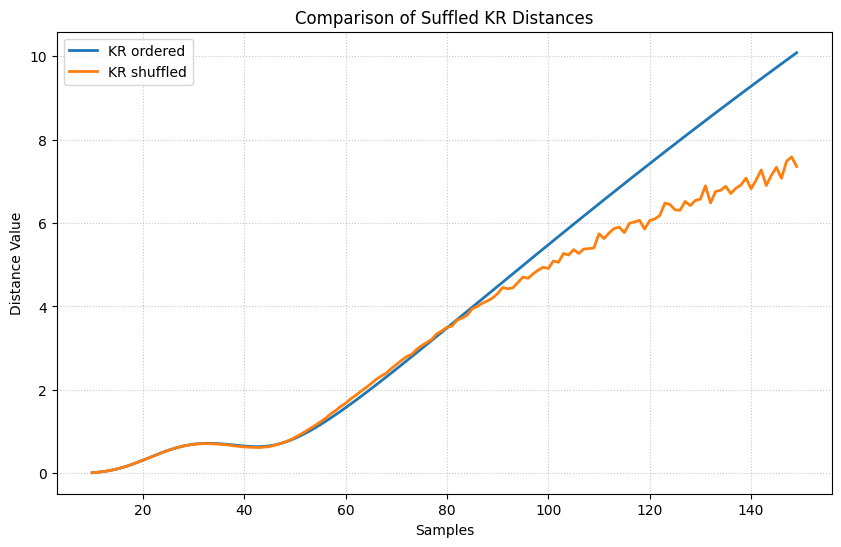

In [5]:
# グラフのサイズを設定（任意）
plt.figure(figsize=(10, 6))
plt.plot(nums, kr_res, label="KR ordered", linestyle="-", linewidth=2)
plt.plot(nums, krs_res, label="KR shuffled", linestyle="-", linewidth=2)
plt.xlabel("Samples")
plt.ylabel("Distance Value")
plt.title("Comparison of Suffled KR Distances")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [7]:
list(reversed([1,2,3]))

[3, 2, 1]